## CAR CRASH Severe Accident Research ##
<br>

<li>  Data Preparation </li>
<li>  Fit Model </li>
<li>  Validate Model </li>
<li>  Use Model </li>


### Step 1: Data Prep ### 

In [18]:
#read data from csv file
import pandas as pd

df = pd.read_csv("C:/Users/xiaop/Documents/car_crash_04_23/Crash_Data.csv")
df.head()

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,...,AREA_TYPE,SYSTEM,VSP,OWNERSHIP,PLAN_DISTRICT,MPO_NAME,RTE_NM,RNS_MP,NODE,OFFSET
0,-78.870556,38.645544,1,152915206,2015,2015/10/16 17:00:00+00,1700,A,0,2,...,Rural,VDOT Primary,2,1. State Hwy Agency,Central Shenandoah,NaN,R-VA SR00259SB,9.63,586049.0,834.0
1,-77.134973,38.943531,2,153060033,2015,2015/10/10 17:00:00+00,2350,O,0,0,...,Urban,NonVDOT secondary,7,4. Federal Roads,Northern Virginia,NOVA,R-VA OT90072NB,0.41,NaN,NaN
2,-79.499399,36.660702,3,153035144,2015,2015/10/29 17:00:00+00,1124,B,0,0,...,Rural,VDOT Secondary,6,1. State Hwy Agency,West Piedmont,NaN,R-VA071SC00750SB,5.90,518624.0,137.0
3,-77.336244,38.545770,4,150975078,2015,2015/04/06 17:00:00+00,900,O,0,0,...,Urban,VDOT Secondary,7,1. State Hwy Agency,Northern Virginia,NOVA,R-VA076SC00619EB,25.74,NaN,NaN
4,-79.337225,36.581073,5,152335159,2015,2015/08/21 17:00:00+00,751,O,0,0,...,Urban,NonVDOT primary,6,3. City or Town Hwy Agency,West Piedmont,DAN,R-VA US00058WB,301.27,519895.0,876.0


In [19]:
#create target variable as fatal or severe injury

df['Fatal_Severe'] = df["CRASH_SEVERITY"].apply(lambda x: 1 if (x =='A') | (x=='K') else 0)
df["Fatal_Severe"].value_counts()

0    922559
1     54787
Name: Fatal_Severe, dtype: int64

<AxesSubplot:xlabel='CRASH_YEAR'>

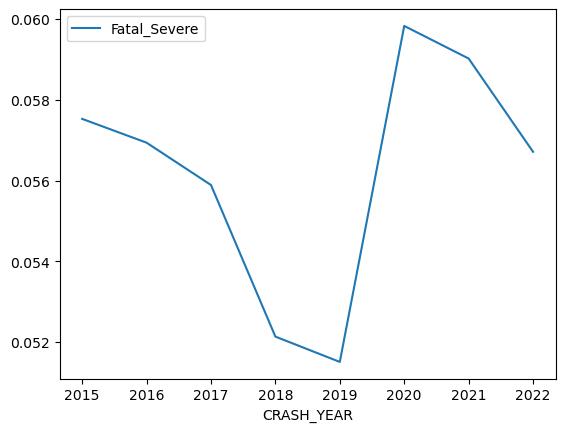

In [20]:
#create target variable over time
import matplotlib.pyplot as plt

df1 = pd.DataFrame(df.groupby(['CRASH_YEAR']).Fatal_Severe.mean()).reset_index()
df1.plot(x="CRASH_YEAR", y="Fatal_Severe")

In [21]:
#create new dataset which includes variables that we are interested in\

new_df = df[['Fatal_Severe', 'WEATHER_CONDITION', 'LIGHT_CONDITION', 'ALCOHOL_NOTALCOHOL', 'DISTRACTED_NOTDISTRACTED', 'DRUG_NODRUG', 'SPEED_NOTSPEED', 'SPEED_DIFF_MAX']]
new_df.isnull().sum()

Fatal_Severe                     0
WEATHER_CONDITION                0
LIGHT_CONDITION                  0
ALCOHOL_NOTALCOHOL               0
DISTRACTED_NOTDISTRACTED         0
DRUG_NODRUG                      0
SPEED_NOTSPEED                   0
SPEED_DIFF_MAX              783400
dtype: int64

In [22]:
#imputing missing data for column SPEED_DIFF_MAX to be 0
import numpy as np
new_df[new_df['SPEED_DIFF_MAX'].isnull()]['SPEED_NOTSPEED'].value_counts()  #proves that when SPEED_DIFF_MAX is NaN the driver did not go over the speed limit
new_df['SPEED_DIFF_MAX'] = new_df['SPEED_DIFF_MAX'].replace(np.nan, 0)
new_df.isnull().sum()

C:\Users\xiaop\AppData\Local\Temp\ipykernel_9812\2702913730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['SPEED_DIFF_MAX'] = new_df['SPEED_DIFF_MAX'].replace(np.nan, 0)


Fatal_Severe                0
WEATHER_CONDITION           0
LIGHT_CONDITION             0
ALCOHOL_NOTALCOHOL          0
DISTRACTED_NOTDISTRACTED    0
DRUG_NODRUG                 0
SPEED_NOTSPEED              0
SPEED_DIFF_MAX              0
dtype: int64

In [23]:
#grouping character variables with multiple levels to reduce number of levels
for i in ['WEATHER_CONDITION', 'LIGHT_CONDITION', 'ALCOHOL_NOTALCOHOL', 'DISTRACTED_NOTDISTRACTED', 'DRUG_NODRUG']:
    print(df.groupby([i]).Fatal_Severe.mean())

WEATHER_CONDITION
1. No Adverse Condition (Clear/Cloudy)    0.058578
10. Blowing Sand, Soil, Dirt, or Snow     0.052778
11. Severe Crosswinds                     0.081481
3. Fog                                    0.067519
4. Mist                                   0.058302
5. Rain                                   0.043228
6. Snow                                   0.029842
7. Sleet/Hail                             0.040924
8. Smoke/Dust                             0.114286
9. Other                                  0.048363
Not Applicable                            0.000000
Name: Fatal_Severe, dtype: float64
LIGHT_CONDITION
1. Dawn                                0.044008
2. Daylight                            0.050446
3. Dusk                                0.057630
4. Darkness - Road Lighted             0.059869
5. Darkness - Road Not Lighted         0.079906
6. Darkness - Unknown Road Lighting    0.053379
7. Unknown                             0.019597
Name: Fatal_Severe, dtype: float64

<AxesSubplot:xlabel='WEATHER_CONDITION'>

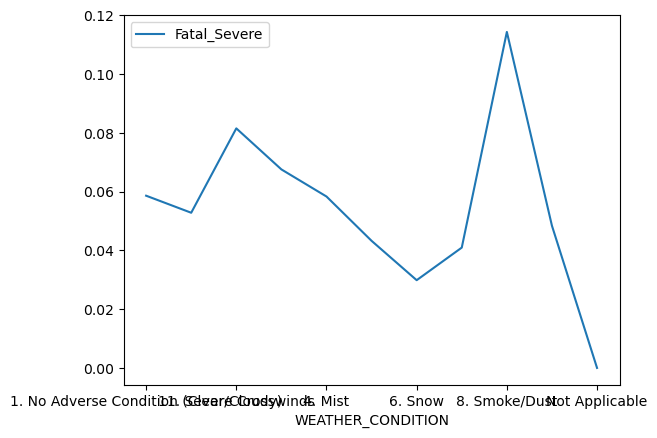

In [24]:
dfw = pd.DataFrame(df.groupby(['WEATHER_CONDITION']).Fatal_Severe.mean()).reset_index()
dfw.plot(x="WEATHER_CONDITION", y="Fatal_Severe")

In [25]:
for i in ['WEATHER_CONDITION', 'LIGHT_CONDITION', 'ALCOHOL_NOTALCOHOL', 'DISTRACTED_NOTDISTRACTED', 'DRUG_NODRUG']:
    print(df.groupby([i]).Fatal_Severe.sum())

WEATHER_CONDITION
1. No Adverse Condition (Clear/Cloudy)    47365
10. Blowing Sand, Soil, Dirt, or Snow        19
11. Severe Crosswinds                        33
3. Fog                                      322
4. Mist                                     796
5. Rain                                    5543
6. Snow                                     477
7. Sleet/Hail                               163
8. Smoke/Dust                                 4
9. Other                                     65
Not Applicable                                0
Name: Fatal_Severe, dtype: int64
LIGHT_CONDITION
1. Dawn                                 1160
2. Daylight                            32492
3. Dusk                                 1630
4. Darkness - Road Lighted              7734
5. Darkness - Road Not Lighted         11612
6. Darkness - Unknown Road Lighting      124
7. Unknown                                35
Name: Fatal_Severe, dtype: int64
ALCOHOL_NOTALCOHOL
No     45656
Yes     9131
Name: Fatal_

<AxesSubplot:xlabel='LIGHT_CONDITION'>

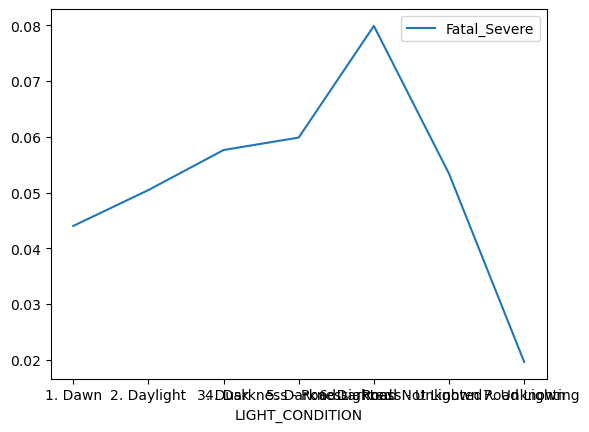

In [26]:
dfl = pd.DataFrame(df.groupby(['LIGHT_CONDITION']).Fatal_Severe.mean()).reset_index()
dfl.plot(x="LIGHT_CONDITION", y="Fatal_Severe")

In [27]:
new_df['WEATHER'] = new_df["WEATHER_CONDITION"].apply(lambda x: "Bad_Weather" if x in ("10. Blowing Sand, Soil, Dirt, or Snow", "11. Severe Crosswinds", "3. Fog", "4. Mist", "6. Snow", "7. Sleet/Hail", "8. Smoke/Dust", "9. Other", "Not Applicable") else x)
new_df.WEATHER.value_counts()

C:\Users\xiaop\AppData\Local\Temp\ipykernel_9812\3506680270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['WEATHER'] = new_df["WEATHER_CONDITION"].apply(lambda x: "Bad_Weather" if x in ("10. Blowing Sand, Soil, Dirt, or Snow", "11. Severe Crosswinds", "3. Fog", "4. Mist", "6. Snow", "7. Sleet/Hail", "8. Smoke/Dust", "9. Other", "Not Applicable") else x)


1. No Adverse Condition (Clear/Cloudy)    808585
5. Rain                                   128227
Bad_Weather                                40534
Name: WEATHER, dtype: int64

In [28]:
new_df['LIGHT'] = new_df["LIGHT_CONDITION"].apply(lambda x: "Semi_Dark" if x in ("1. Dawn", "3. Dusk", "4. Darkness - Road Lighted", "6. Darkness - Unknown Road Lighting", "7. Unknown") else x)
new_df.LIGHT.value_counts()

C:\Users\xiaop\AppData\Local\Temp\ipykernel_9812\3656702248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['LIGHT'] = new_df["LIGHT_CONDITION"].apply(lambda x: "Semi_Dark" if x in ("1. Dawn", "3. Dusk", "4. Darkness - Road Lighted", "6. Darkness - Unknown Road Lighting", "7. Unknown") else x)


2. Daylight                       644092
Semi_Dark                         187934
5. Darkness - Road Not Lighted    145320
Name: LIGHT, dtype: int64

In [29]:
pd.get_dummies(new_df)

,Fatal_Severe,SPEED_DIFF_MAX,WEATHER_CONDITION_1. No Adverse Condition (Clear/Cloudy),"WEATHER_CONDITION_10. Blowing Sand, Soil, Dirt, or Snow",WEATHER_CONDITION_11. Severe Crosswinds,WEATHER_CONDITION_3. Fog,WEATHER_CONDITION_4. Mist,WEATHER_CONDITION_5. Rain,WEATHER_CONDITION_6. Snow,WEATHER_CONDITION_7. Sleet/Hail,...,DRUG_NODRUG_No,DRUG_NODRUG_Yes,SPEED_NOTSPEED_No,SPEED_NOTSPEED_Yes,WEATHER_1. No Adverse Condition (Clear/Cloudy),WEATHER_5. Rain,WEATHER_Bad_Weather,LIGHT_2. Daylight,LIGHT_5. Darkness - Road Not Lighted,LIGHT_Semi_Dark
0,1,3.0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
1,0,10.0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
2,0,0.0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
3,0,0.0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
4,0,0.0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977341,0,0.0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
977342,0,0.0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
977343,0,0.0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
977344,0,0.0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1


In [30]:
new_df = new_df.replace({'5. Darkness - Road Not Lighted': 'Dark', '2. Daylight': "Daylight", "1. No Adverse Condition (Clear/Cloudy)": "Clear", "5. Rain": "Rain"})
new_df.WEATHER.value_counts()

Clear          808585
Rain           128227
Bad_Weather     40534
Name: WEATHER, dtype: int64

In [48]:
#standardize variable and create dummy variable
import math

mean_dff = df[(df['SPEED_DIFF_MAX']<100)]['SPEED_DIFF_MAX'].mean() # max_diff will be capped at 65
std_dff = df[(df['SPEED_DIFF_MAX']<100)]['SPEED_DIFF_MAX'].std()
#new_df['S_SPEED_DIFF'] = new_df["SPEED_DIFF_MAX"].apply(lambda x: 1/(1+math.exp((mean_dff-x)/std_dff)) if x<=100 else 1/(1+math.exp((mean_dff-100)/std_dff)))
new_df['S_SPEED_DIFF'] = new_df["SPEED_DIFF_MAX"].apply(lambda x: (x-mean_dff)/std_dff if x<=100 else (100-mean_dff)/std_dff)

new_df2 = new_df[['Fatal_Severe', 'WEATHER', 'LIGHT', 'ALCOHOL_NOTALCOHOL', 'DISTRACTED_NOTDISTRACTED', 'DRUG_NODRUG', 'S_SPEED_DIFF']]
fin_df = pd.get_dummies(new_df2)
print(mean_dff)
print(std_dff)

13.656724576249337
10.709103681110932


In [15]:
# describe distribution of standardized and transformed speed diff
new_df['S_SPEED_DIFF'].describe()

count    977346.000000
mean          0.266820
std           0.139212
min           0.212827
25%           0.212827
50%           0.212827
75%           0.212827
max           0.993195
Name: S_SPEED_DIFF, dtype: float64

In [16]:
fin_df.head()

,Fatal_Severe,S_SPEED_DIFF,WEATHER_Bad_Weather,WEATHER_Clear,WEATHER_Rain,LIGHT_Dark,LIGHT_Daylight,LIGHT_Semi_Dark,ALCOHOL_NOTALCOHOL_No,ALCOHOL_NOTALCOHOL_Yes,DISTRACTED_NOTDISTRACTED_No,DISTRACTED_NOTDISTRACTED_Yes,DRUG_NODRUG_No,DRUG_NODRUG_Yes
0,1,0.265495,0,1,0,0,1,0,1,0,0,1,1,0
1,0,0.415790,0,1,0,1,0,0,0,1,0,1,1,0
2,0,0.212827,0,1,0,0,1,0,1,0,1,0,1,0
3,0,0.212827,0,1,0,0,1,0,1,0,1,0,1,0
4,0,0.212827,0,1,0,0,1,0,1,0,1,0,1,0


In [78]:
# save the data as a parquet file
fin_df.to_csv('C:/Users/xiaop/Documents/car_crash_04_23/Crash_Data_Final.csv', sep=',')

### Step 2: Fit Logistic Regression Model ### 

In [51]:
# read in the dataset which can be used for model development
import pandas as pd
import numpy as np
fin_df = pd.read_csv('C:/Users/xiaop/Documents/car_crash_04_23/Crash_Data_Final.csv', sep=',').drop('Unnamed: 0', axis = 1)

In [52]:
#split sample to build logistic regression and validate model
from sklearn.model_selection import train_test_split
y_data = fin_df['Fatal_Severe']
x_data = fin_df.drop('Fatal_Severe', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,test_size = .3)

In [53]:
y_train.mean()

0.05620324435570393

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

### Validate Models on Test Sample ###

In [55]:
y_pred = model.predict(x_test)

In [56]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[276816,     52],
       [ 16297,     39]], dtype=int64)

In [57]:
# understand model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    276868
           1       0.43      0.00      0.00     16336

    accuracy                           0.94    293204
   macro avg       0.69      0.50      0.49    293204
weighted avg       0.92      0.94      0.92    293204



In [58]:
model.coef_

array([[ 0.33822239, -0.2859129 ,  0.01608316, -0.31397674,  0.00521937,
        -0.25967209, -0.32935377, -0.85626215,  0.27245566, -0.29578506,
        -0.28802143, -0.63276845,  0.04896196]])

In [59]:
# print out the coefficient of logistic regression model
def logreg_to_dict(clf: LogisticRegression, feature_names: list[str]) -> dict[str, float]:
    coefs = np.concatenate([clf.intercept_, clf.coef_.squeeze()])
    return dict(zip(["intercept"] + feature_names, coefs))
coeff = logreg_to_dict(model, x_train.columns.to_list())
coeff

{'intercept': -0.5846483408461267,
 'S_SPEED_DIFF': 0.3382223870266028,
 'WEATHER_Bad_Weather': -0.28591290204750974,
 'WEATHER_Clear': 0.01608315671313138,
 'WEATHER_Rain': -0.3139767447850392,
 'LIGHT_Dark': 0.005219365004001404,
 'LIGHT_Daylight': -0.25967208556050336,
 'LIGHT_Semi_Dark': -0.32935376956291446,
 'ALCOHOL_NOTALCOHOL_No': -0.8562621544849812,
 'ALCOHOL_NOTALCOHOL_Yes': 0.27245566436554297,
 'DISTRACTED_NOTDISTRACTED_No': -0.2957850604234319,
 'DISTRACTED_NOTDISTRACTED_Yes': -0.2880214296959401,
 'DRUG_NODRUG_No': -0.6327684460776237,
 'DRUG_NODRUG_Yes': 0.04896195595817203}

In [43]:
x_train.columns.to_list()

['S_SPEED_DIFF',
 'WEATHER_Bad_Weather',
 'WEATHER_Clear',
 'WEATHER_Rain',
 'LIGHT_Dark',
 'LIGHT_Daylight',
 'LIGHT_Semi_Dark',
 'ALCOHOL_NOTALCOHOL_No',
 'ALCOHOL_NOTALCOHOL_Yes',
 'DISTRACTED_NOTDISTRACTED_No',
 'DISTRACTED_NOTDISTRACTED_Yes',
 'DRUG_NODRUG_No',
 'DRUG_NODRUG_Yes']

### Using the model ###

In [74]:
import math

#make functions to have user input to calc model

def speed_CAL():
    while True:
        speed = int(input("How much faster are you going compared to the speed limit? (mph): "))
        try:  
            if speed < 0:
                raise ValueError
            elif speed <= 100:
                #x = 1/(1+math.exp((13.656724576249337-speed)/10.709103681110932))
                s = (speed-13.656724576249337)/10.709103681110932
                return [s]
            else:
                #x = 1/(1+math.exp((13.656724576249337-100)/10.709103681110932))
                s = (100-13.656724576249337)/10.709103681110932
                return [s]
        except ValueError:
            print("Please insert an integer greater than or equal to zero")
            pass


def weather_CAL():
    while True:
        w = input("What weather condition are you driving in? (Clear/Rain/Bad): ")
        try:
            if w == "Clear":
                return [0,1,0]
            elif w == "Rain":
                return [0,0,1]
            elif w == "Bad":
                return [1,0,0]
            else:
                raise ValueError
        except ValueError:
            print("Please insert one of the choices listed")
            pass

def light_CAL():
    while True:
        light = input("What is the light level outside? (Daylight/SemiDark/Dark): ")
        try:
            if light == "Daylight":
                return [0,1,0]
            elif light == "SemiDark":
                return [0,0,1]
            elif light == "Dark":
                return [1,0,0]
            else:
                raise ValueError
        except ValueError:
            print("Please insert one of the choices listed")
            pass

def Alc():
    while True:
        ALC = input("Did you drink alcohol before driving? (y/n): ")
        try:
            if ALC == "y":
                return [0,1]
            elif ALC == "n":
                return [1,0]
            else:
                raise ValueError
        except ValueError:
            print("Please insert y or n")
            pass

def Drug():
    while True:
        Drug = input("Did you do drugs before driving? (y/n): ")
        try:
            if Drug == "y":
                return [0,1]
            elif Drug == "n":
                return [1,0]
            else:
                raise ValueError
        except ValueError:
            print("Please insert y or n")
            pass

def Distract():
    while True:
        dis = input("Are you distracted when driving? (y/n): ")
        try:
            if dis == "y":
                return [0,1]
            elif dis == "n":
                return [1,0]
            else:
                raise ValueError
        except ValueError:
            print("Please insert y or n")
            pass

user_array = []
for i in [speed_CAL(), weather_CAL(), light_CAL(), Alc(), Drug(), Distract()]:
        x = i
        if len(x)==1:
            user_array.append(x[0])
        else:
            for j in range(len(x)):
                user_array.append(x[j])

print(user_array)

How much faster are you going compared to the speed limit? (mph): 0
What weather condition are you driving in? (Clear/Rain/Bad): Clear
What is the light level outside? (Daylight/SemiDark/Dark): Daylight
Did you drink alcohol before driving? (y/n): n
Did you do drugs before driving? (y/n): n
Are you distracted when driving? (y/n): n
[-1.2752444072735531, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]


In [61]:
coeff = {'intercept': -0.5846483408461267,
 'S_SPEED_DIFF': 0.3382223870266028,
 'WEATHER_Bad_Weather': -0.28591290204750974,
 'WEATHER_Clear': 0.01608315671313138,
 'WEATHER_Rain': -0.3139767447850392,
 'LIGHT_Dark': 0.005219365004001404,
 'LIGHT_Daylight': -0.25967208556050336,
 'LIGHT_Semi_Dark': -0.32935376956291446,
 'ALCOHOL_NOTALCOHOL_No': -0.8562621544849812,
 'ALCOHOL_NOTALCOHOL_Yes': 0.27245566436554297,
 'DISTRACTED_NOTDISTRACTED_No': -0.2957850604234319,
 'DISTRACTED_NOTDISTRACTED_Yes': -0.2880214296959401,
 'DRUG_NODRUG_No': -0.6327684460776237,
 'DRUG_NODRUG_Yes': 0.04896195595817203}

var_list = ['S_SPEED_DIFF',
 'WEATHER_Bad_Weather',
 'WEATHER_Clear',
 'WEATHER_Rain',
 'LIGHT_Dark',
 'LIGHT_Daylight',
 'LIGHT_Semi_Dark',
 'ALCOHOL_NOTALCOHOL_No',
 'ALCOHOL_NOTALCOHOL_Yes',
 'DISTRACTED_NOTDISTRACTED_No',
 'DISTRACTED_NOTDISTRACTED_Yes',
 'DRUG_NODRUG_No',
 'DRUG_NODRUG_Yes']

In [75]:
feat = dict(zip(var_list, user_array))
feat

{'S_SPEED_DIFF': -1.2752444072735531,
 'WEATHER_Bad_Weather': 0,
 'WEATHER_Clear': 1,
 'WEATHER_Rain': 0,
 'LIGHT_Dark': 0,
 'LIGHT_Daylight': 1,
 'LIGHT_Semi_Dark': 0,
 'ALCOHOL_NOTALCOHOL_No': 1,
 'ALCOHOL_NOTALCOHOL_Yes': 0,
 'DISTRACTED_NOTDISTRACTED_No': 1,
 'DISTRACTED_NOTDISTRACTED_Yes': 0,
 'DRUG_NODRUG_No': 1,
 'DRUG_NODRUG_Yes': 0}

In [76]:
score = coeff['intercept']
for var in var_list:
    score += coeff[var]*feat[var]
p = 1/(1+math.exp(-score))
increase_p = p - 0.0454611973458229

print("The probability of fatal if crash happened: " + str(round(0.0454611973458229*100, 2)) +"%")
print("The probability of fatal crash increased by: " + str(round(increase_p*100, 2)) + "%")
print("The total probability of fatal crash if crash happened is: " + str(round(p*100,2)) + "%")


The probability of fatal if crash happened: 4.5%
The probability of fatal crash increased by: 0.05%
The total probability of fatal crash if crash happened is: 4.55%
